<a href="https://colab.research.google.com/github/mandarpanse/AI-Healthcare-MSAI/blob/main/AIHealthcare_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Step 1: Read the two CSV files into DataFrames
d1 = files.upload()
patient_df = pd.read_csv('PATIENTS.csv')

def calculate_age(dob, dod):
    dob_date = datetime.strptime(dob, "%Y-%m-%d %H:%M:%S")
    dod_date = datetime.strptime(dod, "%Y-%m-%d %H:%M:%S")
    age = (dod_date - dob_date).days // 365
    return age

# Step 1: Apply calculate_age function to create "age" column
patient_df["age"] = patient_df.apply(lambda row: calculate_age(row["dob"], row["dod"]), axis=1)

d2 = files.upload()
admission_df = pd.read_csv('ADMISSIONS.csv')

d3 = files.upload()
icd_diagnoses = pd.read_csv('DIAGNOSES_ICD.csv')

d4 = files.upload()
d_icd_diagnoses = pd.read_csv('D_ICD_DIAGNOSES.csv')




Saving PATIENTS.csv to PATIENTS (1).csv


Saving ADMISSIONS.csv to ADMISSIONS (1).csv


Saving DIAGNOSES_ICD.csv to DIAGNOSES_ICD (1).csv


Saving D_ICD_DIAGNOSES.csv to D_ICD_DIAGNOSES (1).csv


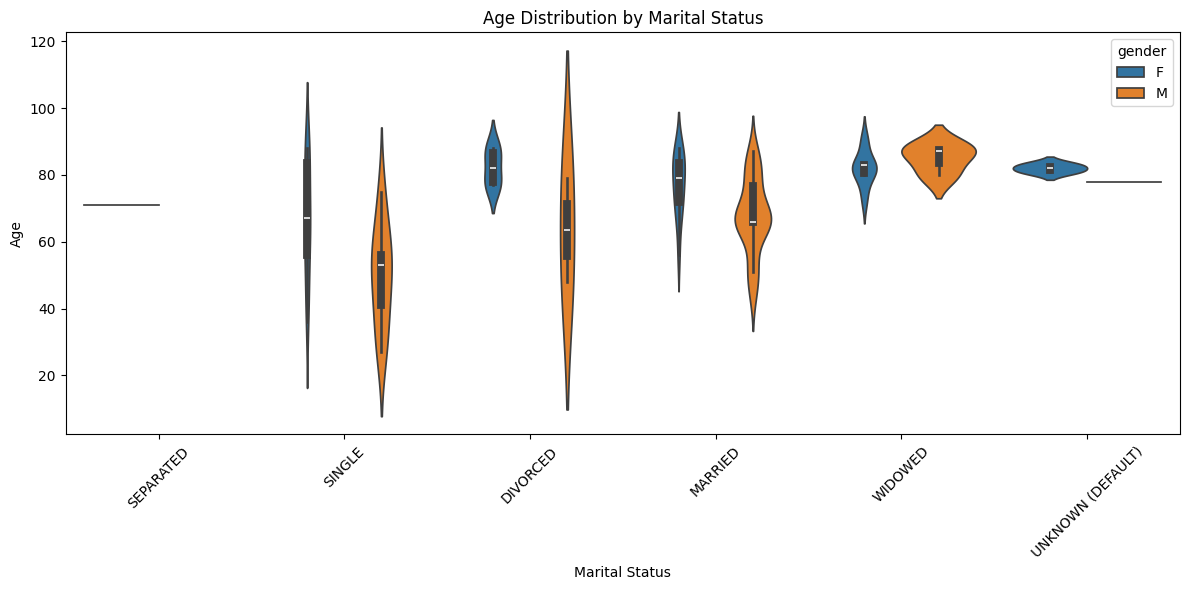

In [ ]:


df = patient_df



# Step 2: Join the two DataFrames on the subject_id column
merged_df = pd.merge(df, admission_df, on='subject_id')
#print(merged_df['admission_type'].unique)


# Filter out rows with age greater than or equal to 120
filtered_df = merged_df[merged_df["age"] < 120]


# Step 3: Generate a violin plot based on age and religion
plt.figure(figsize=(12, 6))
sns.violinplot(x='marital_status', y='age', data=filtered_df, hue='gender')
plt.title('Age Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

plt.show()


<ipython-input-37-9a3dd2226dc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['admittime'] = pd.to_datetime(filtered_df['admittime'])
<ipython-input-37-9a3dd2226dc8>:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=filtered_df[filtered_df['religion'] == 'BUDDHIST'], x='admittime', hue='gender', fill=True, common_norm=False, palette='tab10', alpha=0.7, linewidth=0, label='BUDDHIST')
<ipython-input-37-9a3dd2226dc8>:20: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=filtered_df[filtered_df['religion'] == 'CHRISTIAN SCIENTIST'], x='admittime', hue='gender', fil

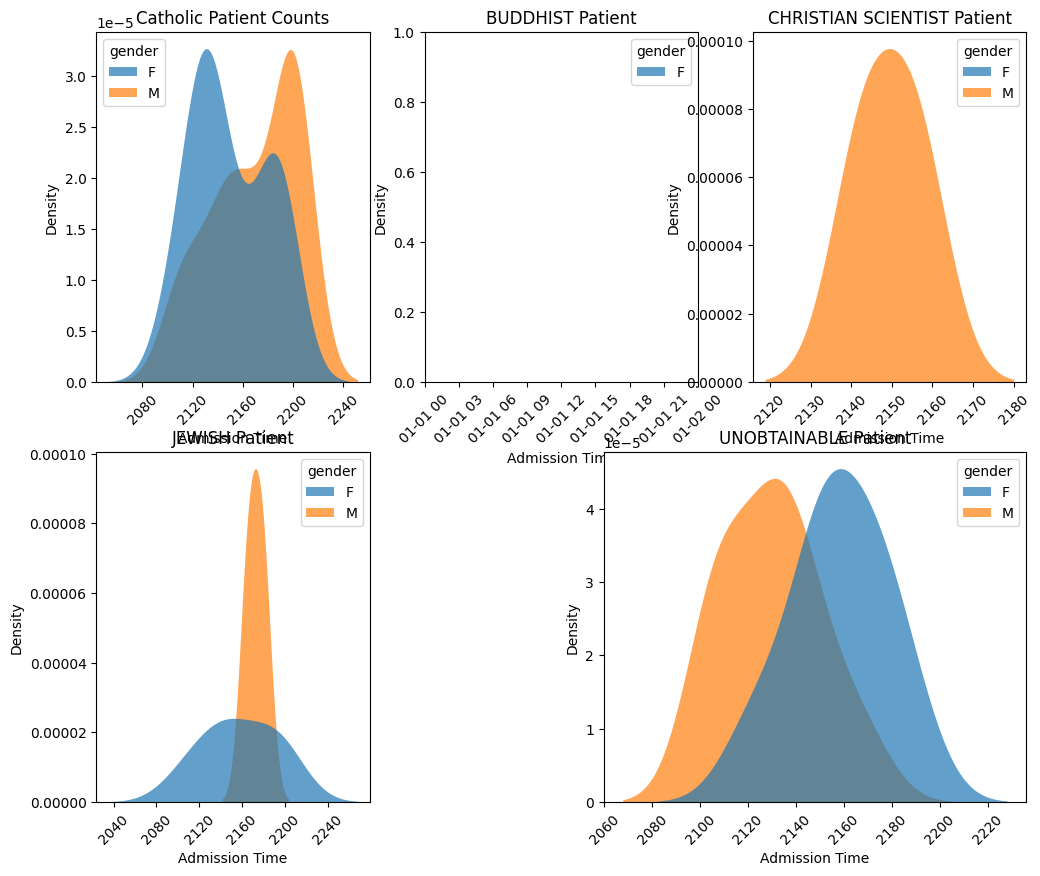

In [37]:
filtered_df['admittime'] = pd.to_datetime(filtered_df['admittime'])

# Create separate Ridge Plots for male and female patients
plt.figure(figsize=(12, 10))
plt.subplot(2, 3, 1)
sns.kdeplot(data=filtered_df[filtered_df['religion'] == 'CATHOLIC'], x='admittime', hue='gender', fill=True, common_norm=False, palette='tab10', alpha=0.7, linewidth=0, label='catholic')
plt.xlabel('Admission Time')
plt.ylabel('Density')
plt.title('Catholic Patient Counts')
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
sns.kdeplot(data=filtered_df[filtered_df['religion'] == 'BUDDHIST'], x='admittime', hue='gender', fill=True, common_norm=False, palette='tab10', alpha=0.7, linewidth=0, label='BUDDHIST')
plt.xlabel('Admission Time')
plt.ylabel('Density')
plt.title('BUDDHIST Patient')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
sns.kdeplot(data=filtered_df[filtered_df['religion'] == 'CHRISTIAN SCIENTIST'], x='admittime', hue='gender', fill=True, common_norm=False, palette='tab10', alpha=0.7, linewidth=0, label='CHRISTIAN SCIENTIST')
plt.xlabel('Admission Time')
plt.ylabel('Density')
plt.title('CHRISTIAN SCIENTIST Patient')
plt.xticks(rotation=45)

plt.subplot(2, 3, 4)
sns.kdeplot(data=filtered_df[filtered_df['religion'] == 'JEWISH'], x='admittime', hue='gender', fill=True, common_norm=False, palette='tab10', alpha=0.7, linewidth=0, label='JEWISH')
plt.xlabel('Admission Time')
plt.ylabel('Density')
plt.title('JEWISH Patient')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.kdeplot(data=filtered_df[filtered_df['religion'] == 'UNOBTAINABLE'], x='admittime', hue='gender', fill=True, common_norm=False, palette='tab10', alpha=0.7, linewidth=0, label='UNOBTAINABLE')
plt.xlabel('Admission Time')
plt.ylabel('Density')
plt.title('UNOBTAINABLE Patient')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()



plt.show()


In [39]:
df_icd_dia = icd_diagnoses
df_icd = d_icd_diagnoses
# Step 2: Join the two DataFrames on the subject_id column
merged_icd_dia_df = pd.merge(df_icd_dia, df_icd, on='icd9_code')

merged_dia_patient_df = pd.merge(merged_icd_dia_df, filtered_df, on='subject_id')
#merged_dia_patient_adm_df = pd.merge(merged_dia_patient_df, admission_df, on='subject_id')

#merged_dia_patient_df = merged_dia_patient_df.drop(['row_id_x', 'row_id'], axis=1);
#merged_dia_patient_adm_df = pd.merge(merged_dia_patient_df, admission_df, on='subject_id')
#merged_dia_patient_adm_df.head(10)


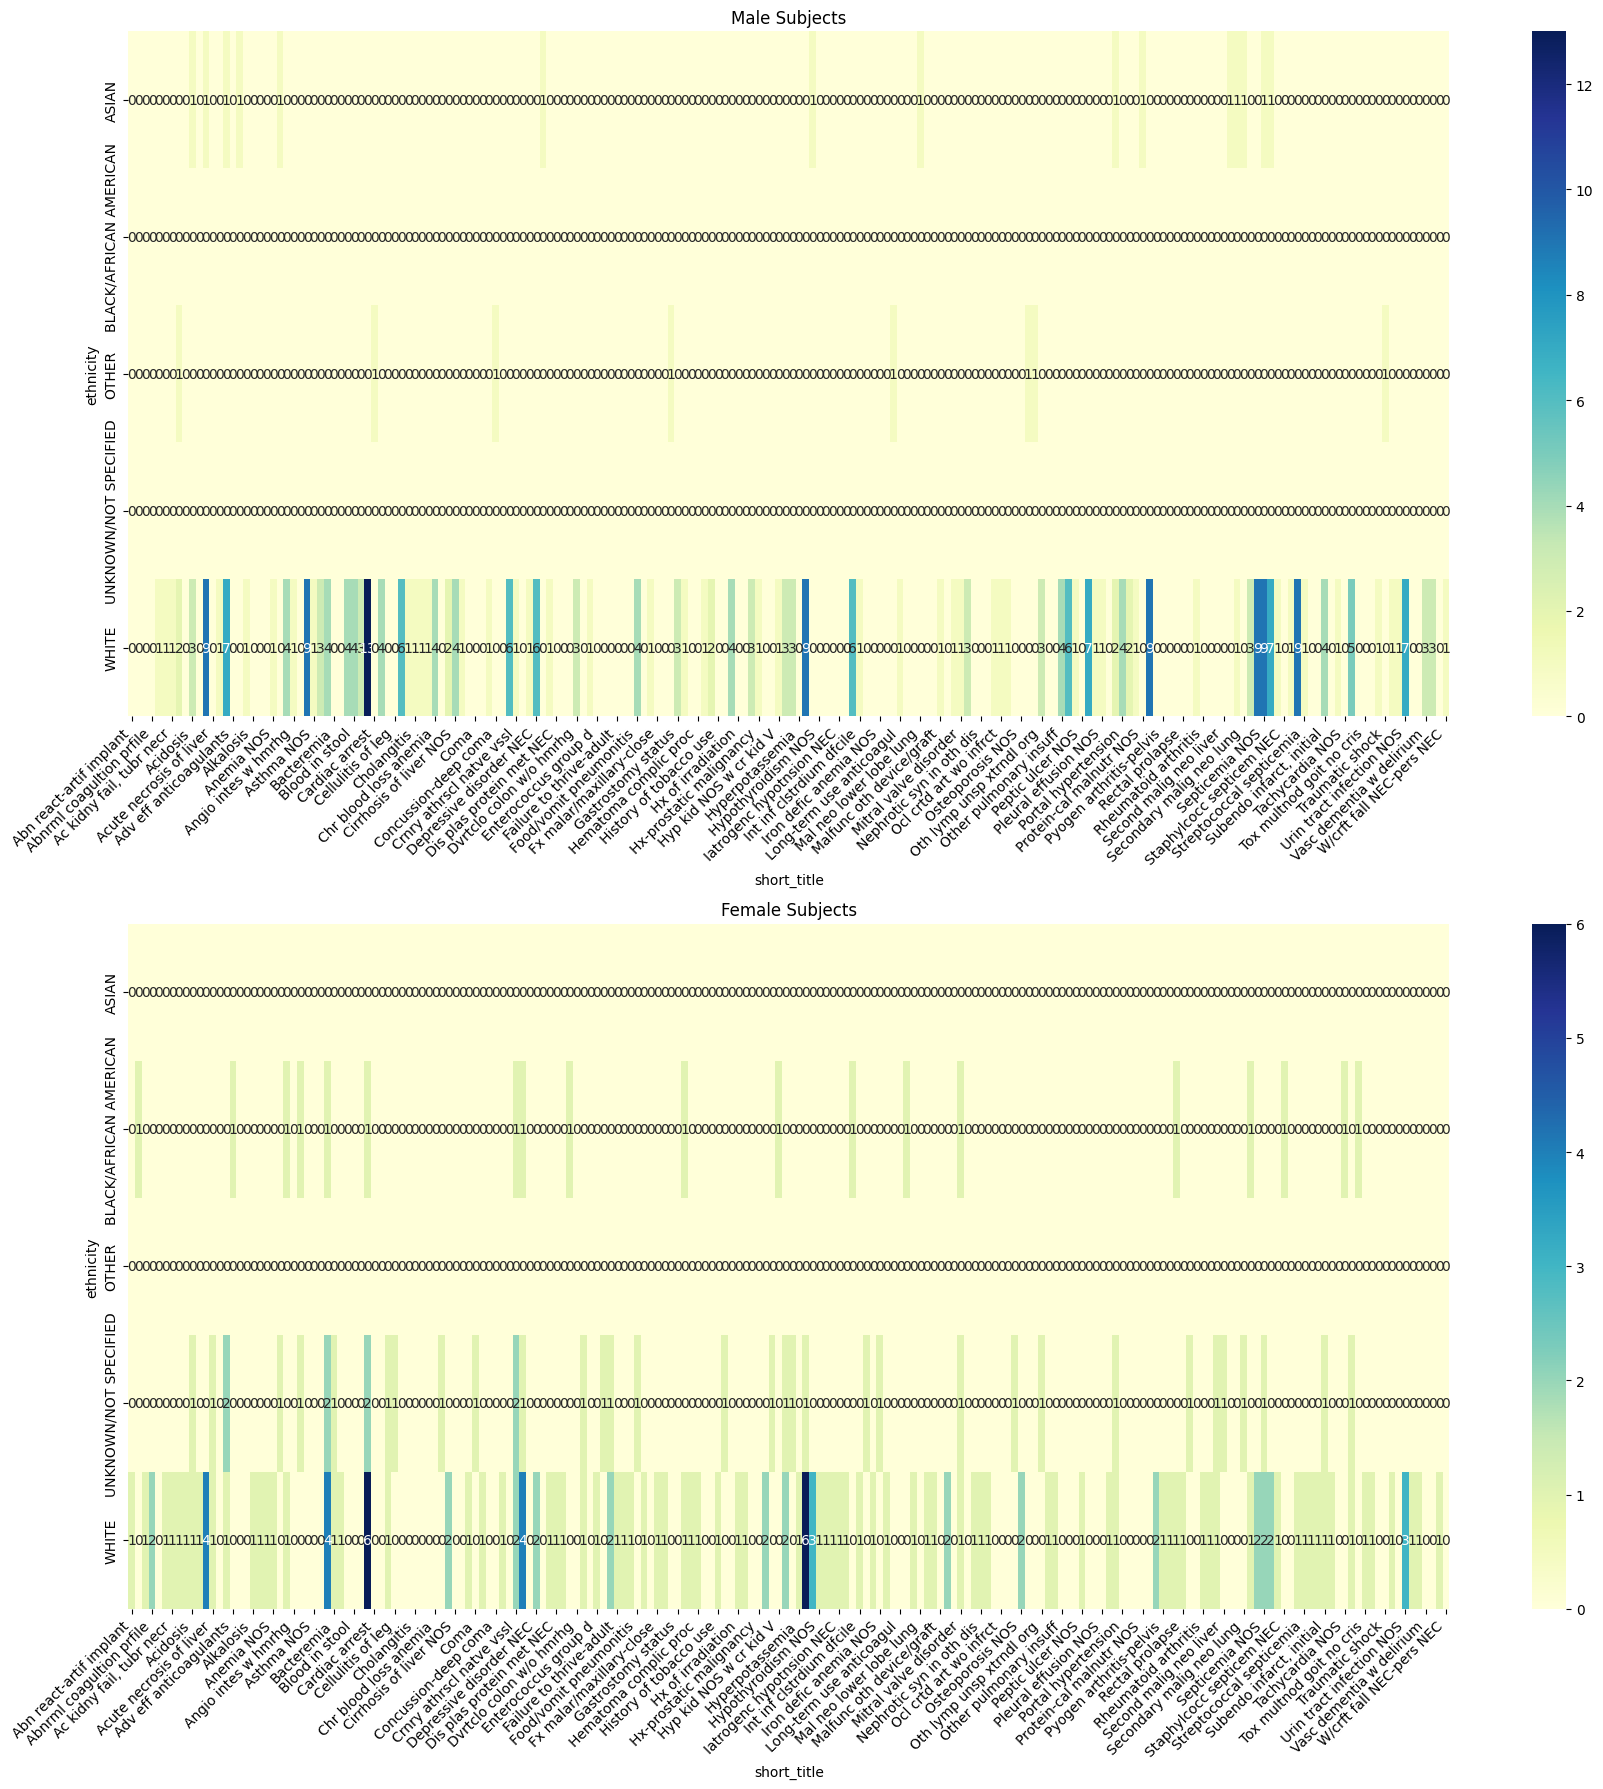

In [49]:
# Create a cross-tabulation of religion, ethnicity, and gender
cross_tab = pd.crosstab(index=[merged_dia_patient_df['ethnicity'].head(500), merged_dia_patient_df['short_title'].head(500)], columns=merged_dia_patient_df['gender'])

# Reset the index for better plot compatibility
cross_tab = cross_tab.reset_index()

# Melt the cross-tabulation for heatmaps
melted_cross_tab = pd.melt(cross_tab, id_vars=['ethnicity', 'short_title'], value_vars=['M', 'F'], var_name='gender')

# Create separate heatmaps for male and female subjects using subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 18))

# Male Subjects Heatmap
male_pivot = melted_cross_tab[melted_cross_tab['gender'] == 'M'].pivot_table(index='ethnicity', columns='short_title', values='value', aggfunc='sum', fill_value=0)
sns.heatmap(male_pivot, annot=True, fmt='d', cmap='YlGnBu', ax=axes[0])
axes[0].set_title("Male Subjects")
axes[0].set_xlabel("short_title")
axes[0].set_ylabel("ethnicity")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Female Subjects Heatmap
female_pivot = melted_cross_tab[melted_cross_tab['gender'] == 'F'].pivot_table(index='ethnicity', columns='short_title', values='value', aggfunc='sum', fill_value=0)
sns.heatmap(female_pivot, annot=True, fmt='d', cmap='YlGnBu', ax=axes[1])
axes[1].set_title("Female Subjects")
axes[1].set_xlabel("short_title")
axes[1].set_ylabel("ethnicity")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

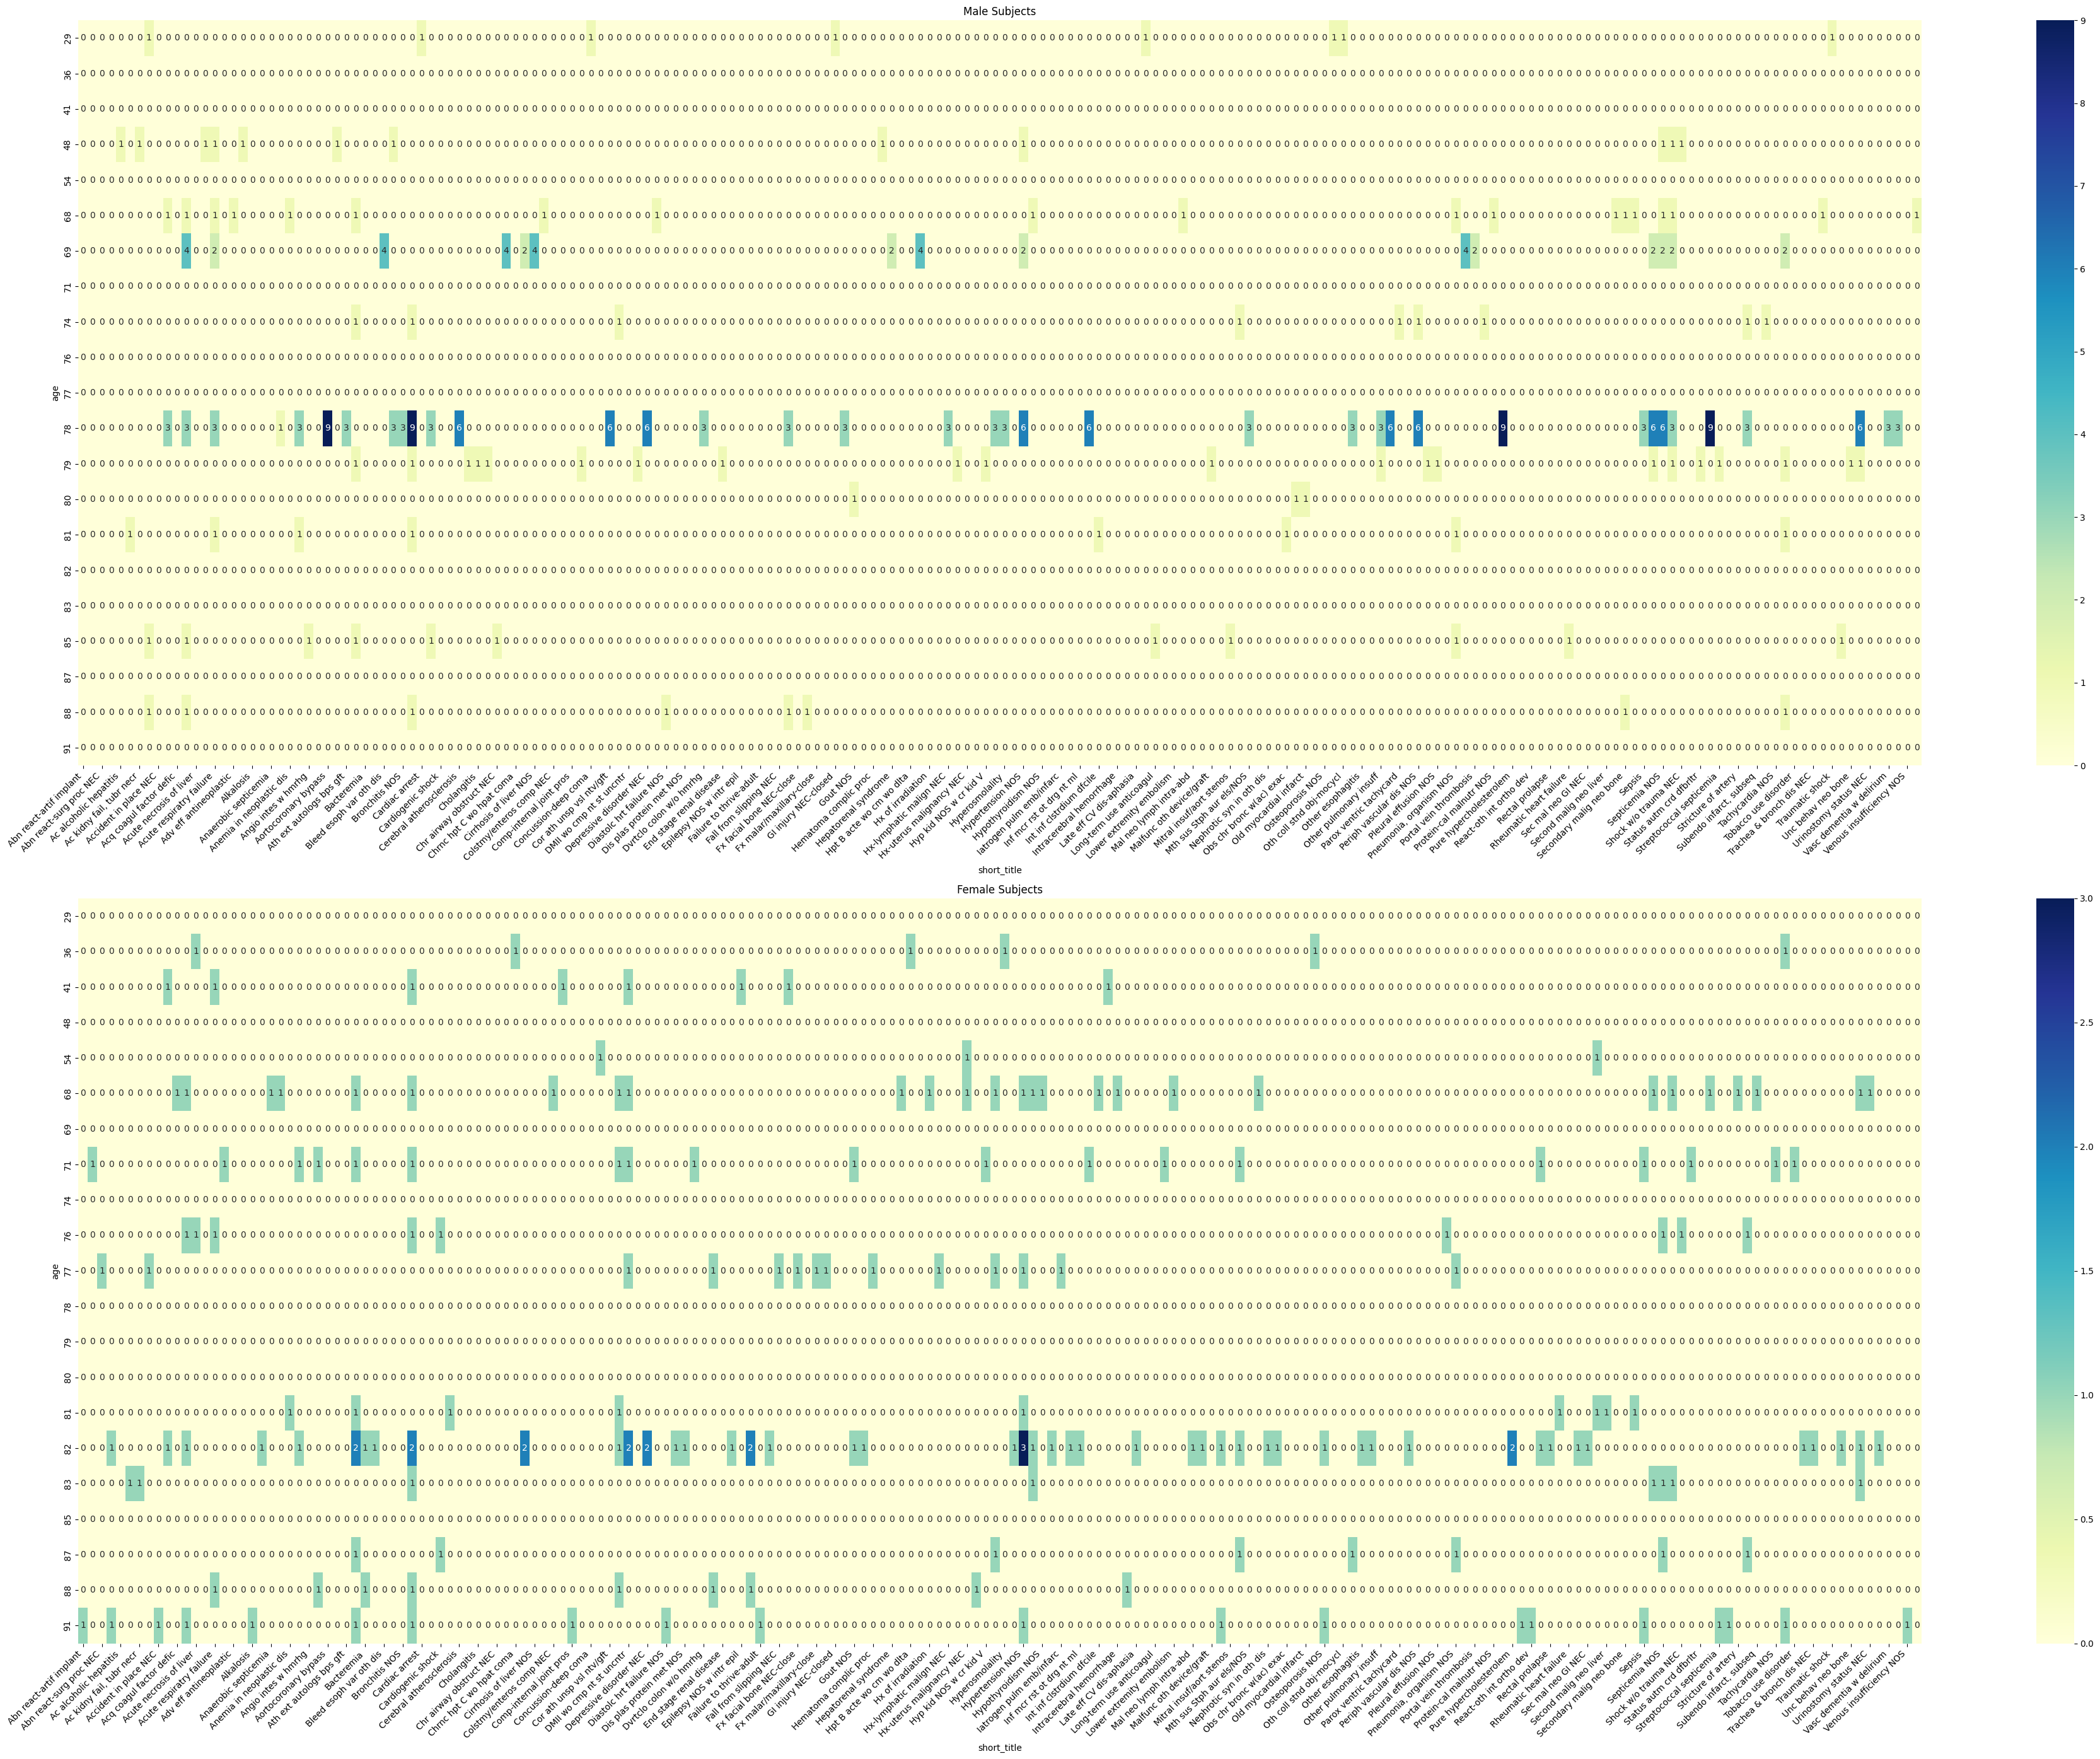

In [47]:
# Create a cross-tabulation of religion, ethnicity, and gender
cross_tab_1 = pd.crosstab(index=[merged_dia_patient_df['age'].head(500), merged_dia_patient_df['short_title'].head(500)], columns=merged_dia_patient_df['gender'])

# Reset the index for better plot compatibility
cross_tab_1 = cross_tab_1.reset_index()

# Melt the cross-tabulation for heatmaps
melted_cross_tab1 = pd.melt(cross_tab_1, id_vars=['age', 'short_title'], value_vars=['M', 'F'], var_name='gender')

# Create separate heatmaps for male and female subjects using subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(38, 28))

# Male Subjects Heatmap
male_pivot = melted_cross_tab1[melted_cross_tab1['gender'] == 'M'].pivot_table(index='age', columns='short_title', values='value', aggfunc='sum', fill_value=0)
sns.heatmap(male_pivot, annot=True, fmt='d', cmap='YlGnBu', ax=axes[0])
axes[0].set_title("Male Subjects")
axes[0].set_xlabel("short_title")
axes[0].set_ylabel("age")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Female Subjects Heatmap
female_pivot = melted_cross_tab1[melted_cross_tab1['gender'] == 'F'].pivot_table(index='age', columns='short_title', values='value', aggfunc='sum', fill_value=0)
sns.heatmap(female_pivot, annot=True, fmt='d', cmap='YlGnBu', ax=axes[1])
axes[1].set_title("Female Subjects")
axes[1].set_xlabel("short_title")
axes[1].set_ylabel("age")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Text(0, 0.5, 'Count')

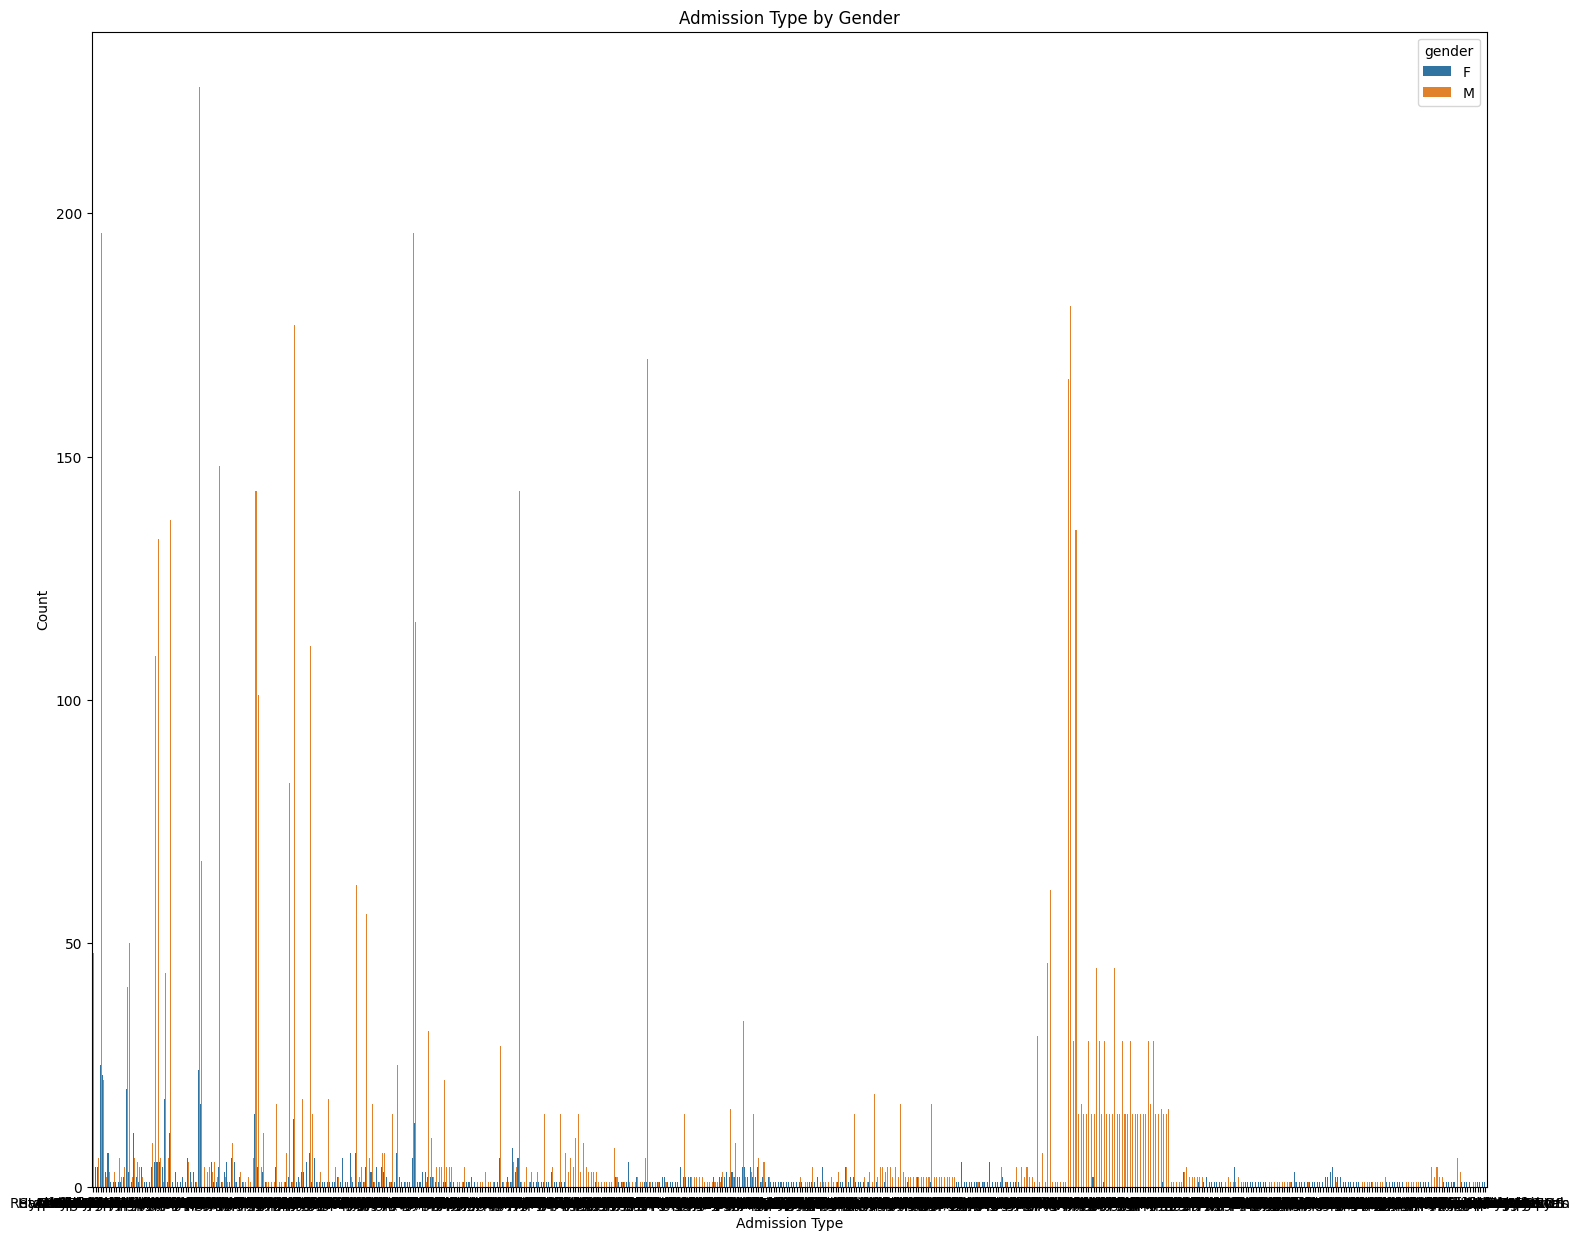

In [54]:
# Create a complex visualization
plt.figure(figsize=(18, 15))

# Analysis 1: Count plot of Admission Types by Gender
#plt.subplot(1, 3, 1)
sns.countplot(data=merged_dia_patient_df, x='short_title', hue='gender')
plt.title("Admission Type by Gender")
plt.xlabel("Admission Type")
plt.ylabel("Count")
